In [2]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv('simulation_data.csv')
data.head()


,e,e_1,e_2,e_3,theta,ref,torque
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.006093,0.000000,0.000000,0.000000,0.002165,0.008258,13.100014
2,0.007670,0.006093,0.000000,0.000000,0.008835,0.016505,4.304472
3,0.008116,0.007670,0.006093,0.000000,0.016616,0.024732,2.108557
4,0.008146,0.008116,0.007670,0.006093,0.024783,0.032928,1.281677


In [4]:
data.columns

Index(['e', 'e_1', 'e_2', 'e_3', 'theta', 'ref', 'torque'], dtype='object')

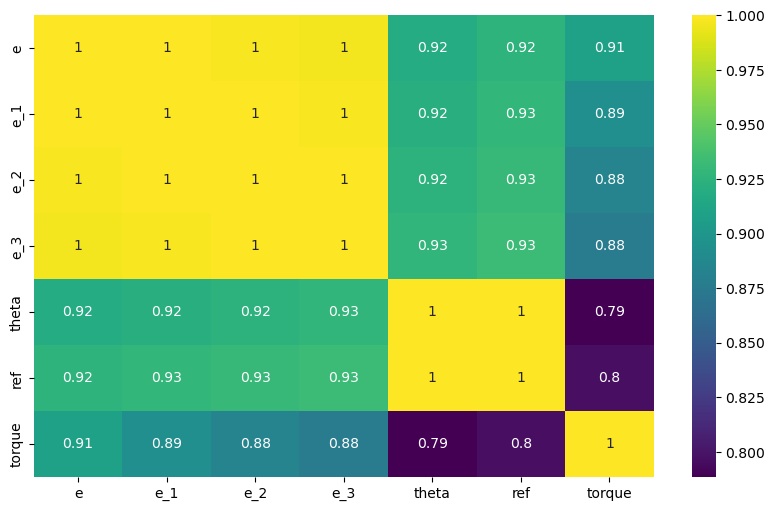

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.show()

In [6]:
data.describe()

,e,e_1,e_2,e_3,theta,ref,torque
count,100100.000000,100100.000000,100100.000000,100100.000000,100100.000000,100100.000000,100100.000000
mean,0.004267,0.004265,0.004263,0.004262,0.073086,0.077353,0.644110
std,0.025791,0.025779,0.025767,0.025755,0.602516,0.626288,4.319833
min,-0.067720,-0.067720,-0.067720,-0.067720,-1.553709,-1.569970,-10.187520
25%,-0.009798,-0.009774,-0.009755,-0.009739,-0.239285,-0.250289,-1.688881
50%,0.003026,0.003005,0.002978,0.002955,0.062637,0.066335,0.480683
75%,0.018746,0.018728,0.018705,0.018683,0.428545,0.447800,2.986944
max,0.081675,0.081675,0.081675,0.081675,1.553642,1.569975,135.356195


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100100 entries, 0 to 100099
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   e       100100 non-null  float64
 1   e_1     100100 non-null  float64
 2   e_2     100100 non-null  float64
 3   e_3     100100 non-null  float64
 4   theta   100100 non-null  float64
 5   ref     100100 non-null  float64
 6   torque  100100 non-null  float64
dtypes: float64(7)
memory usage: 5.3 MB


In [8]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
100095    False
100096    False
100097    False
100098    False
100099    False
Length: 100100, dtype: bool

In [9]:
data.head()

,e,e_1,e_2,e_3,theta,ref,torque
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.006093,0.000000,0.000000,0.000000,0.002165,0.008258,13.100014
2,0.007670,0.006093,0.000000,0.000000,0.008835,0.016505,4.304472
3,0.008116,0.007670,0.006093,0.000000,0.016616,0.024732,2.108557
4,0.008146,0.008116,0.007670,0.006093,0.024783,0.032928,1.281677


In [10]:
# Normalization
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Standardization
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)


In [11]:
target = data['torque']
features = data.drop('torque', axis=1)
features.head()

,e,e_1,e_2,e_3,theta,ref
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.006093,0.000000,0.000000,0.000000,0.002165,0.008258
2,0.007670,0.006093,0.000000,0.000000,0.008835,0.016505
3,0.008116,0.007670,0.006093,0.000000,0.016616,0.024732
4,0.008146,0.008116,0.007670,0.006093,0.024783,0.032928


In [12]:
target.head()

0     0.000000
1    13.100014
2     4.304472
3     2.108557
4     1.281677
Name: torque, dtype: float64

In [13]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split




In [31]:
# using Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Model Score:', score)


Mean Squared Error: 1.0395319378826485e-11
Root Mean Squared Error: 3.224177318142798e-06
Mean Absolute Error: 9.31232029491767e-07
R2 Score: 0.9999999999993945
Model Score: 0.9999999999993945


In [43]:
portions = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
scores = []
root_mean_squared_errors = []
mean_absolute_errors = []

for portion in portions:
    X_train, X_test, y_train, y_test = train_test_split(features[:int(len(features)*portion)], target[:int(len(target)*portion)], test_size=0.2, shuffle=False, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)

    # print('Mean Squared Error {portion}:', mean_squared_error(y_test, y_pred))
    # print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
    # print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    # print('R2 Score:', r2_score(y_test, y_pred))
    print('Model Score '+f'{portion}:', score)


Model Score 0.1: 0.9999999999991639
Model Score 0.2: 0.999999999998671
Model Score 0.3: 0.9999999999996967
Model Score 0.4: 0.9999999999993393
Model Score 0.5: 0.9999999999985851
Model Score 0.6: 0.9999999999990684
Model Score 0.7: 0.9999999999994419
Model Score 0.8: 0.9999999999992302
Model Score 0.9: 0.9999999999993407


In [57]:
import time

bootstrap = [True, False]
for bs in bootstrap:
    for portion in portions:
        X_train, X_test, y_train, y_test = train_test_split(features[:int(len(features)*portion)].drop(['e_1','e_2','e_3'], axis=1), target[:int(len(target)*portion)], test_size=0.2, shuffle=False, random_state=42)

        from sklearn.ensemble import RandomForestRegressor
        start_time = time.time()

        model = RandomForestRegressor(random_state=42, bootstrap=bs)

        model.fit(X_train, y_train)
        #calculate the time it takes to train the model
        print(f'Time to train model {portion}: {time.time() - start_time}')

        y_pred = model.predict(X_test)
        score = model.score(X_test, y_test)

        # print('Mean Squared Error {portion}:', mean_squared_error(y_test, y_pred))
        # print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
        # print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
        # print('R2 Score:', r2_score(y_test, y_pred))
        print('Model Score '+f'{portion}:', score)

Time to train model 0.1: 8.431719064712524
Model Score 0.1: 0.9120791855023103
Time to train model 0.2: 17.35423445701599
Model Score 0.2: 0.7309613590284236
Time to train model 0.3: 27.801624059677124
Model Score 0.3: 0.9239880079279477
Time to train model 0.4: 38.27603888511658
Model Score 0.4: 0.9420691165060011
Time to train model 0.5: 49.51991057395935
Model Score 0.5: 0.8972924146155672
Time to train model 0.6: 62.610835552215576
Model Score 0.6: 0.8987153655843932
Time to train model 0.7: 75.62099003791809
Model Score 0.7: 0.9211721171977566
Time to train model 0.8: 89.23246622085571
Model Score 0.8: 0.9562540752996207
Time to train model 0.9: 98.03445076942444
Model Score 0.9: 0.9357313043111087
Time to train model 0.1: 10.327558040618896
Model Score 0.1: 0.8065560060185641
Time to train model 0.2: 22.04765510559082
Model Score 0.2: 0.6002943206066353
Time to train model 0.3: 35.70464324951172
Model Score 0.3: 0.9022707623793246
Time to train model 0.4: 49.36938261985779
Model 

In [47]:
# X,x,Y,y = train_test_split(features[int(len(features)*portion):].drop(['e_1','e_2','e_3'], axis=1), target[int(len(target)*portion):], test_size=0.2, shuffle=False, random_state=42)

x,y=features[int(len(features)*portion):].drop(['e_1','e_2','e_3'], axis=1), target[int(len(target)*portion):]

y_pred = model.predict(x)
score = model.score(x, y)

print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, y_pred)))
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('R2 Score:', r2_score(y, y_pred))

Mean Squared Error: 0.9457492748562265
Root Mean Squared Error: 0.9724964138012163
Mean Absolute Error: 0.7148909458337954
R2 Score: 0.9486329821925307


In [52]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(features[:int(len(features)*0.1)].drop(['e_1','e_2','e_3'], axis=1), target[:int(len(target)*0.1)], test_size=0.2, shuffle=False, random_state=42)
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1]
}
model_lr = LinearRegression() 

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model_lr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

best_model = grid_search.fit(X_train, y_train)
print(best_model.best_params_)
print(best_model.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
0.6326275292219957


In [54]:
x,y=features[int(len(features)*0.1):].drop(['e_1','e_2','e_3'], axis=1), target[int(len(target)*0.1):]

y_pred = best_model.predict(x)
score = best_model.score(x, y)

print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y, y_pred)))
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('R2 Score:', r2_score(y, y_pred))

Mean Squared Error: 3.1011570989320374
Root Mean Squared Error: 1.7610102495249815
Mean Absolute Error: 0.9551506797580356
R2 Score: 0.8423554450198607


In [56]:
# from sklearn.model_selection import GridSearchCV

# X_train, X_test, y_train, y_test = train_test_split(features[:int(len(features)*0.1)].drop(['e_1','e_2','e_3'], axis=1), target[:int(len(target)*0.1)], test_size=0.2, shuffle=False, random_state=42)
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }


# # Initialize the GridSearchCV object
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# best_model = grid_search.fit(X_train, y_train)
# print(best_model.best_params_)
# print(best_model.best_score_)

# 5- Data Splitting

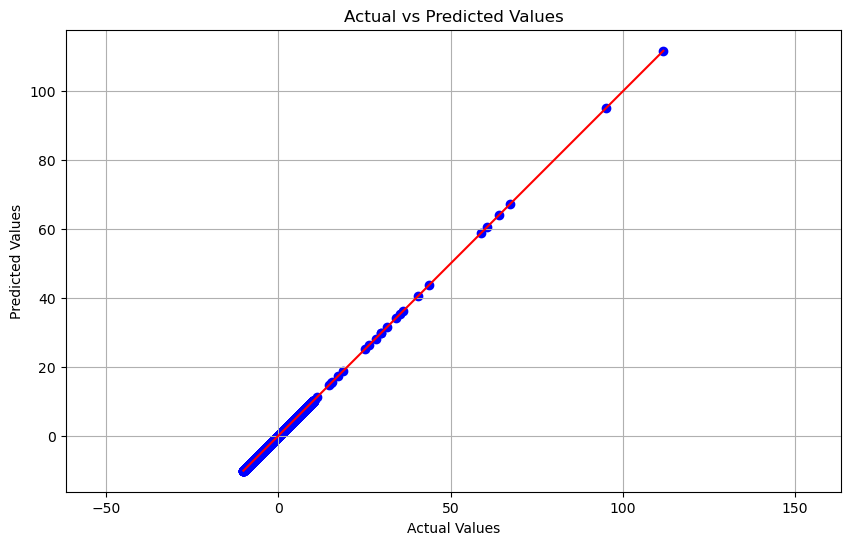

In [37]:
# plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'red')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.axis('equal')
plt.grid(True)

# adding the line of best fit
# m, b = np.polyfit(y_test, y_pred, 1)
# plt.plot(y_test, m*y_test + b, color='green')


plt.show()
